<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


In [8]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3102 - mean_absolute_error: 0.7746 - val_loss: 0.4475 - val_mean_absolute_error: 0.4781
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5489 - mean_absolute_error: 0.4526 - val_loss: 0.4103 - val_mean_absolute_error: 0.4538
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3809 - mean_absolute_error: 0.4336 - val_loss: 0.4030 - val_mean_absolute_error: 0.4574
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3610 - mean_absolute_error: 0.4226 - val_loss: 0.3753 - val_mean_absolute_error: 0.4221
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3259 - mean_absolute_error: 0.4026 - val_loss: 0.3652 - val_mean_absolute_error: 0.4194
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3249 - mean_absolute_error: 0.3986 - val_loss: 0.3581 - val_mean_absolute_error: 0.4117
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3235 - mean_absolute_error: 0.3

In [9]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MAE: {test_mae:.2f}")


129/129 - 1s - 6ms/step - loss: 0.2700 - mean_absolute_error: 0.3518
Test MAE: 0.35


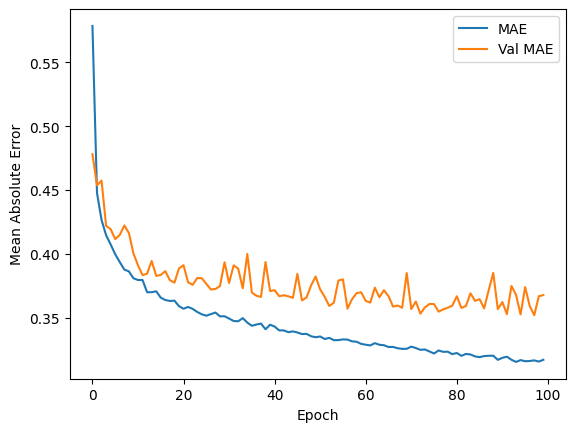

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()